In [37]:
import pandas as pd

# Excel dosyasını oku
df1 = pd.read_csv("/content/abundance.csv")  # dosya adını buraya yaz

df1.head()

,dataset_name,sampleID,subjectID,bodysite,disease,age,gender,country,sequencing_technology,pubmedid,...,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Enterococcaceae|g__Enterococcus|s__Enterococcus_gilvus|t__Enterococcus_gilvus_unclassified,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_otakiensis,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_otakiensis|t__GCF_000415925,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum|s__Desulfotomaculum_ruminis,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum|s__Desulfotomaculum_ruminis|t__GCF_000215085,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Ruminococcaceae|g__Faecalibacterium|s__Faecalibacterium_prausnitzii|t__GCF_000209855,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Megasphaera|s__Megasphaera_sp_BV3C16_1,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Megasphaera|s__Megasphaera_sp_BV3C16_1|t__GCF_000478965
0,Candela_Africa,H10,h10,stool,n,40,female,tanzania,Illumina,25981789,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Candela_Africa,H11,h11,stool,n,29,female,tanzania,Illumina,25981789,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Candela_Africa,H12,h12,stool,n,8,female,tanzania,Illumina,25981789,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Candela_Africa,H13,h13,stool,n,34,male,tanzania,Illumina,25981789,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Candela_Africa,H14,h14,stool,n,30,male,tanzania,Illumina,25981789,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
print(df1['disease'].unique())
print(df1['bodysite'].unique())

['n' 'obesity' 'leaness' 'nd' 'stec2-positive' ' -'
 'ibd_ulcerative_colitis' 'ibd_crohn_disease' 'n_relative' 'y' 'cirrhosis'
 'obese' 'overweight' '-' 'underweight' 't2d' 'impaired_glucose_tolerance'
 'cancer' 'small_adenoma' 'large_adenoma']
['stool' 'nd' 'tongue_dorsum' 'buccal_mucosa' 'supragingival_plaque'
 'anterior_nares' 'posterior_fornix' 'l_retroauricular_crease'
 'r_retroauricular_crease' 'saliva' 'keratinized_gingiva'
 'palatine_tonsils' 'throat' 'subgingival_plaque' 'vaginal_introitus'
 'mid_vagina' 'hard_palate' 'gomito_dx' 'gomito_sx'
 'solco_retroauricolare_dx' 'solco_retroauricolare_sx' 'skin'
 'mother_faeces' 'infant_faeces' 'milk']


bodysite (sample) is important because experiment should be based on same sample type like stool. Disease contains different kind of disease and control. pubmedid is another curical part because it represent the trustability. If no pubmedid, no experiment

In [39]:
# İlk sütun (0. index) ve 14. indexten sonraki sütunları al
df = pd.concat([df1.iloc[:, [0]], df1.iloc[:, [3]], df1.iloc[:, [4]], df1.iloc[:, [9]], df1.iloc[:, 211:]], axis=1)

df = df[df['bodysite'] == 'stool']
# remove the "-" from disease and pubmedid
df = df[df['disease'] != '-']
df = df[df['pubmedid'] != '-']
df = df[df['dataset_name'] != "Candela_Africa"] #Gut microbiota may be different for healthy samples from Africa
df.head()

,dataset_name,bodysite,disease,pubmedid,k__Archaea,k__Archaea|p__Euryarchaeota,k__Archaea|p__Euryarchaeota|c__Methanobacteria,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter,...,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Enterococcaceae|g__Enterococcus|s__Enterococcus_gilvus|t__Enterococcus_gilvus_unclassified,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_otakiensis,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_otakiensis|t__GCF_000415925,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum|s__Desulfotomaculum_ruminis,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum|s__Desulfotomaculum_ruminis|t__GCF_000215085,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Ruminococcaceae|g__Faecalibacterium|s__Faecalibacterium_prausnitzii|t__GCF_000209855,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Megasphaera|s__Megasphaera_sp_BV3C16_1,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Megasphaera|s__Megasphaera_sp_BV3C16_1|t__GCF_000478965
38,Chatelier_gut_obesity,stool,n,23985870,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39,Chatelier_gut_obesity,stool,obesity,23985870,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40,Chatelier_gut_obesity,stool,leaness,23985870,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41,Chatelier_gut_obesity,stool,n,23985870,0.27930,0.27930,0.27930,0.27930,0.27930,0.27930,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42,Chatelier_gut_obesity,stool,leaness,23985870,4.02676,4.02676,4.00849,4.00849,4.00849,4.00849,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
print(df['disease'].unique())
print(df['bodysite'].unique())

['n' 'obesity' 'leaness' 'stec2-positive' ' -' 'ibd_ulcerative_colitis'
 'ibd_crohn_disease' 'n_relative' 'cirrhosis' 'obese' 'overweight'
 'underweight' 't2d' 'impaired_glucose_tolerance' 'cancer' 'small_adenoma'
 'large_adenoma']
['stool']


In [41]:
#disease contain - but in the dataset it contain space before this symbol
df = df[df['disease'] != ' -']
df = df[df['disease'] != 'n_relative'] #no information abt n_relative, so it is removed
df['disease'] = df['disease'].replace('n', 'healthy') #n replace with healthy
print(df['disease'].unique())

['healthy' 'obesity' 'leaness' 'stec2-positive' 'ibd_ulcerative_colitis'
 'ibd_crohn_disease' 'cirrhosis' 'obese' 'overweight' 'underweight' 't2d'
 'impaired_glucose_tolerance' 'cancer' 'small_adenoma' 'large_adenoma']


In [42]:
df.isnull().sum()

,0
dataset_name,0
bodysite,0
disease,0
pubmedid,0
k__Archaea,0
...,...
k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum|s__Desulfotomaculum_ruminis,0
k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum|s__Desulfotomaculum_ruminis|t__GCF_000215085,0
k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Ruminococcaceae|g__Faecalibacterium|s__Faecalibacterium_prausnitzii|t__GCF_000209855,0
k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Megasphaera|s__Megasphaera_sp_BV3C16_1,0


In [43]:
# chechk the first column and give the name

df.columns.values[0] = 'dataset_name'

# Make groups according to dataset name
gruplar = dict(tuple(df.groupby('dataset_name')))

# Print them one by one
for isim, alt_df in gruplar.items():
    print(f"\n Dataset: {isim}")
    print(alt_df)


 Dataset: Chatelier_gut_obesity
              dataset_name bodysite  disease  pubmedid  k__Archaea  \
38   Chatelier_gut_obesity    stool  healthy  23985870     0.00000   
39   Chatelier_gut_obesity    stool  obesity  23985870     0.00000   
40   Chatelier_gut_obesity    stool  leaness  23985870     0.00000   
41   Chatelier_gut_obesity    stool  healthy  23985870     0.27930   
42   Chatelier_gut_obesity    stool  leaness  23985870     4.02676   
..                     ...      ...      ...       ...         ...   
311  Chatelier_gut_obesity    stool  obesity  23985870     0.00000   
312  Chatelier_gut_obesity    stool  healthy  23985870     0.06186   
313  Chatelier_gut_obesity    stool  leaness  23985870     0.07846   
314  Chatelier_gut_obesity    stool  obesity  23985870     0.00000   
315  Chatelier_gut_obesity    stool  obesity  23985870     0.00000   

     k__Archaea|p__Euryarchaeota  \
38                       0.00000   
39                       0.00000   
40                

everything looks good. Pubmedid is ok, bodysite is ok, disease is ok, no NA value. Now microorganism name will be processed. Microorganism name with s__ prefix will be selected and other one will be removed

In [44]:
# keep the second row because our label is disease not dataset name
header_part = df.iloc[:, [2]]
print(header_part.head())

    disease
38  healthy
39  obesity
40  leaness
41  healthy
42  leaness


In [45]:
#select  column name just with s__ prefix
species_cols = [col for col in df.columns[2:] if 's__' in str(col)]
species_data = df[species_cols]
# replace whole column name with their s__ prefix
new_col_names = [c.split('|')[-1] if 's__' in c else c for c in species_data.columns]
species_data.columns = new_col_names
# column names with t__ prefix will be removed
species_data = species_data.loc[:, ~species_data.columns.str.contains('t__')]
print(species_data.head())

    s__Methanobrevibacter_smithii  s__Methanobrevibacter_unclassified  \
38                        0.00000                             0.00000   
39                        0.00000                             0.00000   
40                        0.00000                             0.00000   
41                        0.21412                             0.06518   
42                        3.71449                             0.29400   

    s__Methanosphaera_stadtmanae  s__Actinomyces_graevenitzii  \
38                           0.0                      0.00000   
39                           0.0                      0.00049   
40                           0.0                      0.00000   
41                           0.0                      0.00000   
42                           0.0                      0.00000   

    s__Actinomyces_odontolyticus  s__Actinomyces_turicensis  \
38                       0.00000                        0.0   
39                       0.05377            

In [46]:
# Final dataset: merge 2nd column + filtered species-level column
final_df = pd.concat([header_part, species_data], axis=1)

final_df = final_df.reset_index(drop=True)

In [47]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.describe().T)

check_df(final_df)

##################### Shape #####################
(1877, 1292)
##################### Types #####################
disease                                object
s__Methanobrevibacter_smithii         float64
s__Methanobrevibacter_unclassified    float64
s__Methanosphaera_stadtmanae          float64
s__Actinomyces_graevenitzii           float64
                                       ...   
s__Bavariicoccus_seileri              float64
s__Enterococcus_gilvus                float64
s__Lactobacillus_otakiensis           float64
s__Desulfotomaculum_ruminis           float64
s__Megasphaera_sp_BV3C16_1            float64
Length: 1292, dtype: object
##################### Head #####################
   disease  s__Methanobrevibacter_smithii  s__Methanobrevibacter_unclassified  \
0  healthy                        0.00000                             0.00000   
1  obesity                        0.00000                             0.00000   
2  leaness                        0.00000                    

In [48]:
# select name with s__ in final_df
microbe_cols = [col for col in final_df.columns if col.startswith('s__')]

# as DataFrame
microbe_data = final_df[microbe_cols]

# Find microorganism which have just 0 value for all sample
all_zero_cols = microbe_data.columns[(microbe_data == 0).all()]

print(f"The number of microorganism with just 0 value --> ({len(all_zero_cols)}):")
print(all_zero_cols.tolist())

The number of microorganism with just 0 value --> (475):
['s__Microcoleus_unclassified', 's__Enterocytozoon_bieneusi', 's__Actinomyces_neuii', 's__Actinomyces_sp_ICM39', 's__Actinomyces_urogenitalis', 's__Corynebacterium_kroppenstedtii', 's__Corynebacterium_pseudogenitalium', 's__Corynebacterium_pyruviciproducens', 's__Corynebacterium_tuberculostearicum', 's__Dermabacter_sp_HFH0086', 's__Micrococcus_luteus', 's__Propionibacterium_avidum', 's__Bifidobacterium_minimum', 's__Prevotella_paludivivens', 's__Chryseobacterium_gleum', 's__Chryseobacterium_unclassified', 's__Elizabethkingia_meningoseptica', 's__Empedobacter_brevis', 's__Thermus_unclassified', 's__Paenibacillus_barengoltzii', 's__Paenibacillus_lactis', 's__Staphylococcus_haemolyticus', 's__Staphylococcus_lugdunensis', 's__Staphylococcus_pseudintermedius', 's__Enterococcus_saccharolyticus', 's__Lactobacillus_sp_7_1_47FAA', 's__Leuconostoc_fallax', 's__Streptococcus_canis', 's__Streptococcus_pyogenes', 's__Clostridium_sporogenes', 

In [49]:
# remove microorganism which have just 0 value for all sample
final_df = final_df.drop(columns=all_zero_cols)

# Find microorganism which have just 0 value for all sample
all_zero = final_df.columns[(final_df == 0).all()]

# Yazdır
print(f"The number of microorganism with just 0 value --> ({len(all_zero)} ):")
print(all_zero.tolist())

The number of microorganism with just 0 value --> (0 ):
[]


                            disease      Ratio
disease                                       
healthy                         906  48.268514
t2d                             223  11.880661
obesity                         164   8.737347
ibd_ulcerative_colitis          148   7.884923
cirrhosis                       118   6.286628
leaness                          89   4.741609
stec2-positive                   52   2.770378
impaired_glucose_tolerance       49   2.610549
cancer                           48   2.557272
small_adenoma                    26   1.385189
ibd_crohn_disease                25   1.331913
large_adenoma                    13   0.692595
overweight                       10   0.532765
obese                             5   0.266383
underweight                       1   0.053277
##########################################


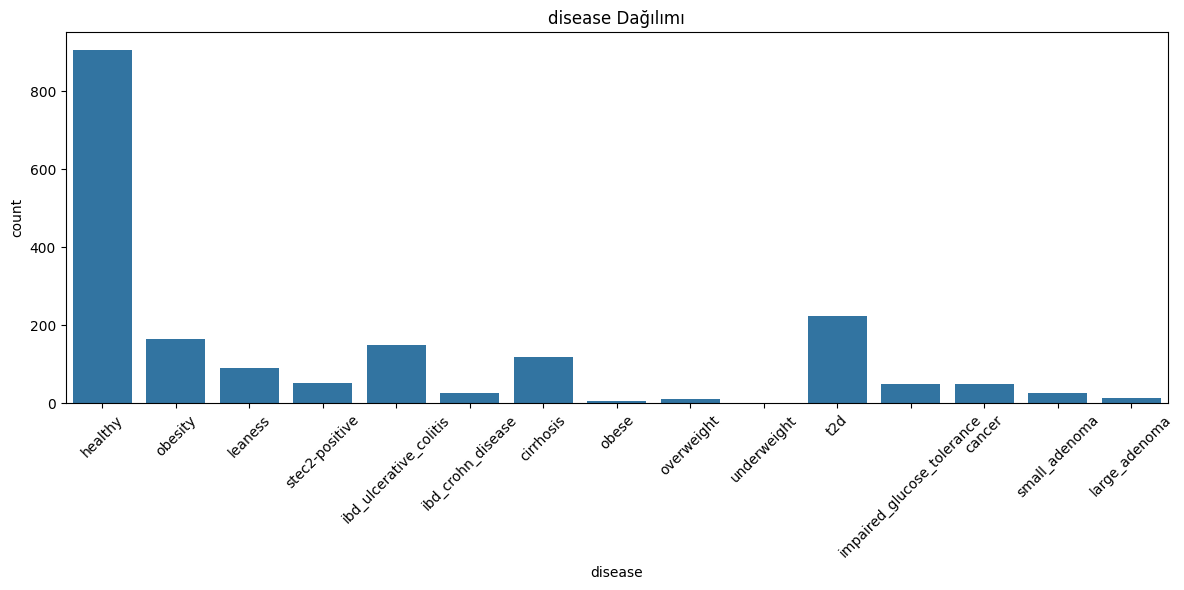

In [50]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action="ignore")

def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        plt.figure(figsize=(12, 6))  # Grafiği büyüttük
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.xticks(rotation=45)  # Etiketler yatay değilse okunabilirlik için
        plt.title(f"{col_name} Dağılımı")
        plt.tight_layout()
        plt.show()

cat_summary(final_df, "disease", plot=True)


In [51]:
final_df = final_df[final_df['disease'] != 'underweight']
final_df['disease'] = final_df['disease'].replace('obese', 'obesity')
final_df['disease'] = final_df['disease'].replace('cancer', 'CRC')

In [52]:
def disease_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
disease_summary(final_df, "disease")

                            disease      Ratio
disease                                       
healthy                         906  48.294243
t2d                             223  11.886994
obesity                         169   9.008529
ibd_ulcerative_colitis          148   7.889126
cirrhosis                       118   6.289979
leaness                          89   4.744136
stec2-positive                   52   2.771855
impaired_glucose_tolerance       49   2.611940
CRC                              48   2.558635
small_adenoma                    26   1.385928
ibd_crohn_disease                25   1.332623
large_adenoma                    13   0.692964
overweight                       10   0.533049


In [53]:
grouped_dfs = {name: group for name, group in final_df.groupby("disease")}

# overview of all microorganism in all different disease group
for name, subdf in grouped_dfs.items():
    print(f"\n Disease: {name}")
    print(subdf.describe())


 Disease: CRC
       s__Methanobrevibacter_smithii  s__Methanobrevibacter_unclassified  \
count                      48.000000                           48.000000   
mean                        3.529869                            0.120215   
std                         7.970575                            0.467956   
min                         0.000000                            0.000000   
25%                         0.000000                            0.000000   
50%                         0.103855                            0.000000   
75%                         3.877038                            0.001092   
max                        49.058170                            2.530130   

       s__Methanosphaera_stadtmanae  s__Actinomyces_graevenitzii  \
count                     48.000000                    48.000000   
mean                       0.000907                     0.002117   
std                        0.003588                     0.004897   
min                        0

In [54]:
final_df.isnull().sum()
final_df.isna().sum()

,0
disease,0
s__Methanobrevibacter_smithii,0
s__Methanobrevibacter_unclassified,0
s__Methanosphaera_stadtmanae,0
s__Actinomyces_graevenitzii,0
...,...
s__Bavariicoccus_seileri,0
s__Enterococcus_gilvus,0
s__Lactobacillus_otakiensis,0
s__Desulfotomaculum_ruminis,0


In [55]:
def grab_col_names(dataframe):
    """


    Returns
    ------
        cat_cols: list
                categorical variables list
        num_cols: list
                numerical variables list
"""

    # num_cols
    numeric_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    categoric_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]


    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(categoric_cols)}')
    print(f'num_cols: {len(numeric_cols)}')


    return numeric_cols, categoric_cols


numeric_cols, categoric_cols = grab_col_names(final_df)

Observations: 1876
Variables: 817
cat_cols: 1
num_cols: 816


In [56]:
# analysis of microorganism abundance value depend on the disease types one by one
##################################

def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")

for col in numeric_cols:
    target_summary_with_num(final_df, "disease", col)

Görüntülenen çıkış son 5000 satıra kısaltıldı.


                            s__Veillonella_sp_oral_taxon_780
disease                                                     
CRC                                                 0.000000
cirrhosis                                           0.001043
healthy                                             0.000428
ibd_crohn_disease                                   0.000000
ibd_ulcerative_colitis                              0.000000
impaired_glucose_tolerance                          0.000000
large_adenoma                                       0.000000
leaness                                             0.000000
obesity                                             0.000000
overweight                                          0.000000
small_adenoma                                       0.000000
stec2-positive                                      0.000000
t2d                                                 0.000000


                            s__Fus

In [57]:
final = final_df.copy()

y_dis = final["disease"] # Use the encoded target variable
X_num = final.drop(["disease"], axis=1) # Drop both original and encoded target

X_num2 = final.drop(["disease"], axis=1)
y_dis2 = final["disease"]

X_num = X_num.apply(pd.to_numeric, errors='coerce')
print(X_num.dtypes.head())


s__Methanobrevibacter_smithii         float64
s__Methanobrevibacter_unclassified    float64
s__Methanosphaera_stadtmanae          float64
s__Actinomyces_graevenitzii           float64
s__Actinomyces_odontolyticus          float64
dtype: object


# We will check if there are significant differences between microorganisms in all disease types.
The one-way ANOVA test only tells if there is a significant difference between groups. It does not tell which groups there is a difference between. p-adjust values are obtained with Bonferroni

In [58]:
import pandas as pd
from scipy.stats import f_oneway

def anova_microbes(X, y):
    results = []

    for microbe in X.columns:
        # her grup için ayrı liste topla
        groups = [X[y == label][microbe].dropna() for label in y.unique()]

        # en az 2 grup olmalı ve her grubun içinde en az 2 gözlem olmalı
        if sum([len(g) >= 2 for g in groups]) >= 2:
            try:
                stat, pval = f_oneway(*groups)
                results.append((microbe, pval))
            except Exception as e:
                continue

    df_results = pd.DataFrame(results, columns=["Microbe", "p_value"])
    df_results["adjusted_p"] = df_results["p_value"] * len(df_results)  # Bonferroni düzeltmesi
    df_results = df_results.sort_values("p_value")
    return df_results
anova_microbes(X_num, y_dis)

,Microbe,p_value,adjusted_p
201,s__Veillonella_unclassified,1.868145e-111,1.524406e-108
198,s__Veillonella_atypica,5.390530e-72,4.398673e-69
138,s__Coprococcus_comes,1.435152e-68,1.171084e-65
141,s__Dorea_formicigenerans,3.340635e-65,2.725958e-62
133,s__Ruminococcus_obeum,2.494736e-64,2.035704e-61
...,...,...,...
680,s__Treponema_medium,9.999856e-01,8.159882e+02
659,s__Leptotrichia_hofstadii,9.999859e-01,8.159885e+02
536,s__Polaromonas_unclassified,9.999875e-01,8.159898e+02
488,s__Staphylococcus_epidermidis,9.999890e-01,8.159910e+02


Trying to find top 6 microorganism which have significant role in all disease including healthy. Visualized version of above code. p-adjust value obtained with Benjamini-Hochberg. The first 6 species is same with two hypotetical approach

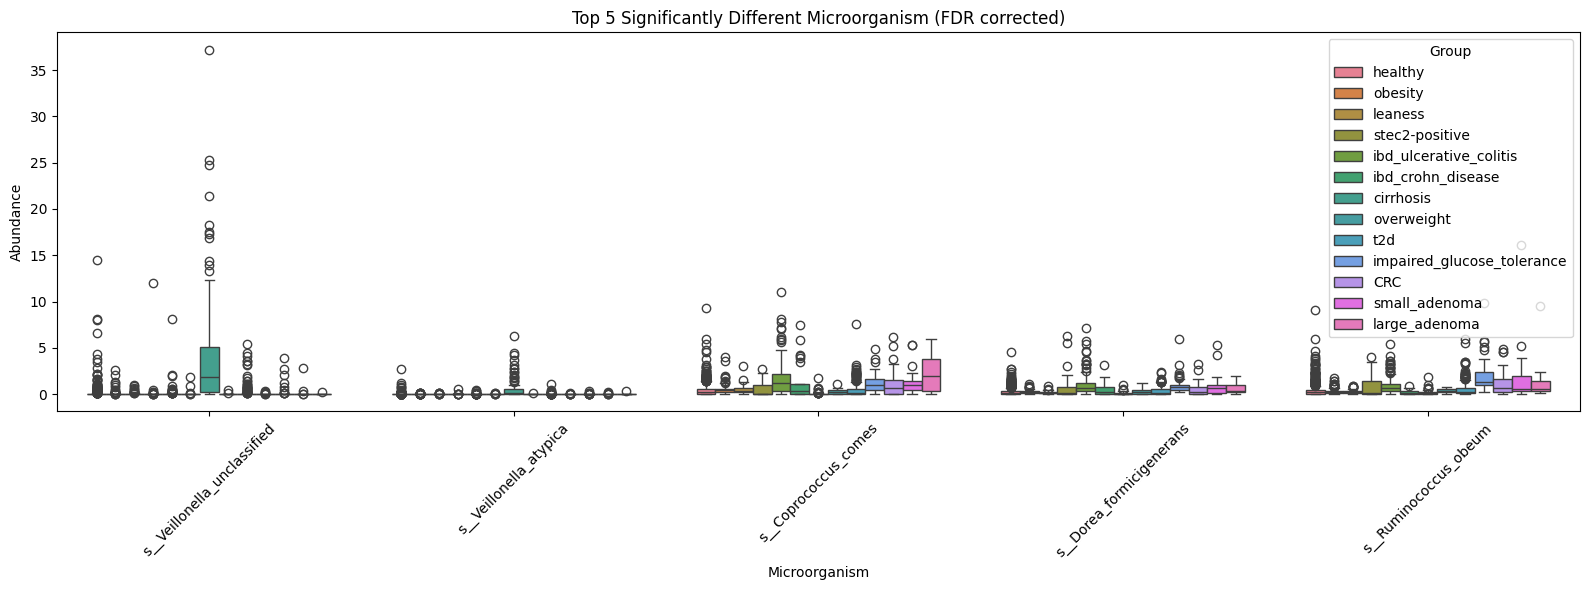

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from statsmodels.stats.multitest import multipletests

def anova_fdr_visualize(X, y, top_n=5):
    results = []

    for microbe in X.columns:
        groups = [X[y == label][microbe].dropna() for label in y.unique()]
        if sum([len(g) >= 2 for g in groups]) >= 2:
            try:
                stat, pval = f_oneway(*groups)
                results.append((microbe, pval))
            except Exception:
                continue

    # Sonuçları dataframe'e dök
    df_results = pd.DataFrame(results, columns=["Microorganism", "p_value"])

    # FDR (Benjamini-Hochberg) düzeltmesi
    rejected, pvals_corrected, _, _ = multipletests(df_results["p_value"], method="fdr_bh")
    df_results["FDR_pval"] = pvals_corrected
    df_results["Significant"] = rejected
    df_results = df_results.sort_values("FDR_pval")

    # Anlamlı mikroorganizmaları seç
    top_microbes = df_results[df_results["Significant"]].head(top_n)["Microorganism"].tolist()

    # Veri frame'i birleştir (plot için)
    df_plot = X[top_microbes].copy()
    df_plot["Group"] = y.values

    # Plotla
    melted = df_plot.melt(id_vars="Group", var_name="Microorganism", value_name="Abundance")
    plt.figure(figsize=(16, 6))
    sns.boxplot(data=melted, x="Microorganism", y="Abundance", hue="Group")
    plt.xticks(rotation=45)
    plt.title(f"Top {top_n} Significantly Different Microorganism (FDR corrected)")
    plt.tight_layout()
    plt.show()

    return df_results
# X = mikroorganizma abundance verisi (sadece numerik)
# y = hastalık grubu etiketleri (string olabilir, encode gerek yok)

anova_results = anova_fdr_visualize(X_num, y_dis, top_n=5)


all microorganism is analyzed with statistical test for each group one by one and top 5 microorganisms are selected according to p-adjusted values.
if data has normal distrubution--> t-testi, not --> Mann-Whitney U
Bonferroni for p-adjusted value


 Analyzing: obesity vs healthy


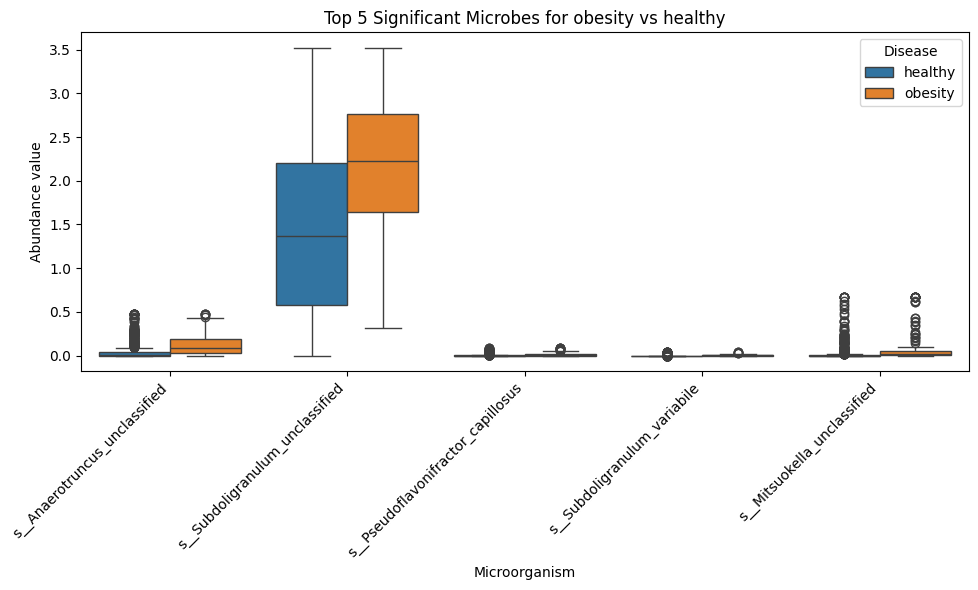

                          Microorganism       p_value    adjusted_p
163       s__Anaerotruncus_unclassified  1.857281e-22  1.515541e-19
173     s__Subdoligranulum_unclassified  9.388064e-20  7.660660e-17
122  s__Pseudoflavonifractor_capillosus  2.954830e-19  2.411141e-16
174        s__Subdoligranulum_variabile  2.114584e-15  1.725500e-12
197         s__Mitsuokella_unclassified  1.894744e-14  1.546111e-11

 Analyzing: leaness vs healthy


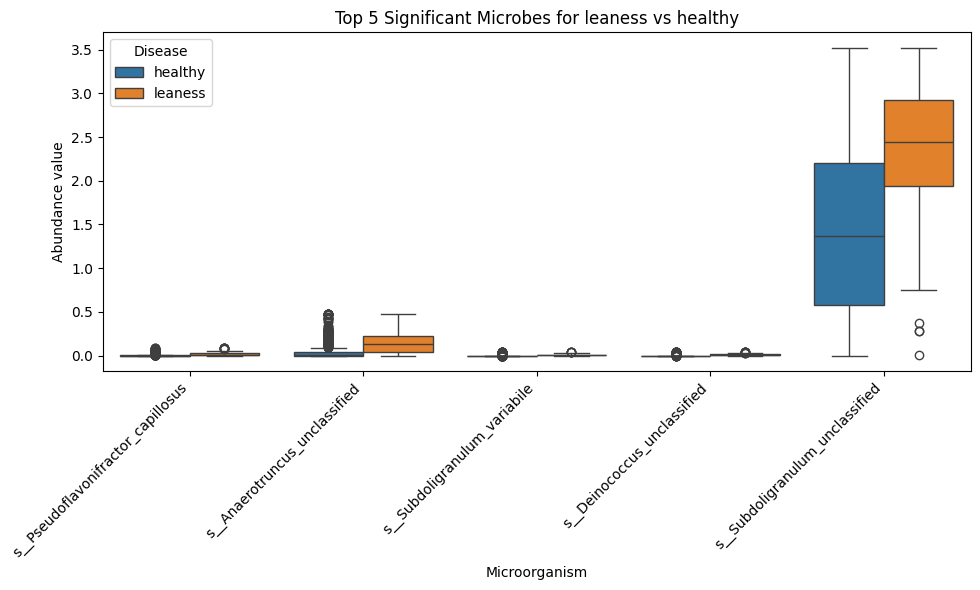

                          Microorganism       p_value    adjusted_p
122  s__Pseudoflavonifractor_capillosus  6.927171e-24  5.652572e-21
163       s__Anaerotruncus_unclassified  2.141876e-23  1.747771e-20
174        s__Subdoligranulum_variabile  1.248504e-19  1.018779e-16
290         s__Deinococcus_unclassified  1.395095e-18  1.138398e-15
173     s__Subdoligranulum_unclassified  1.493718e-17  1.218874e-14

 Analyzing: stec2-positive vs healthy


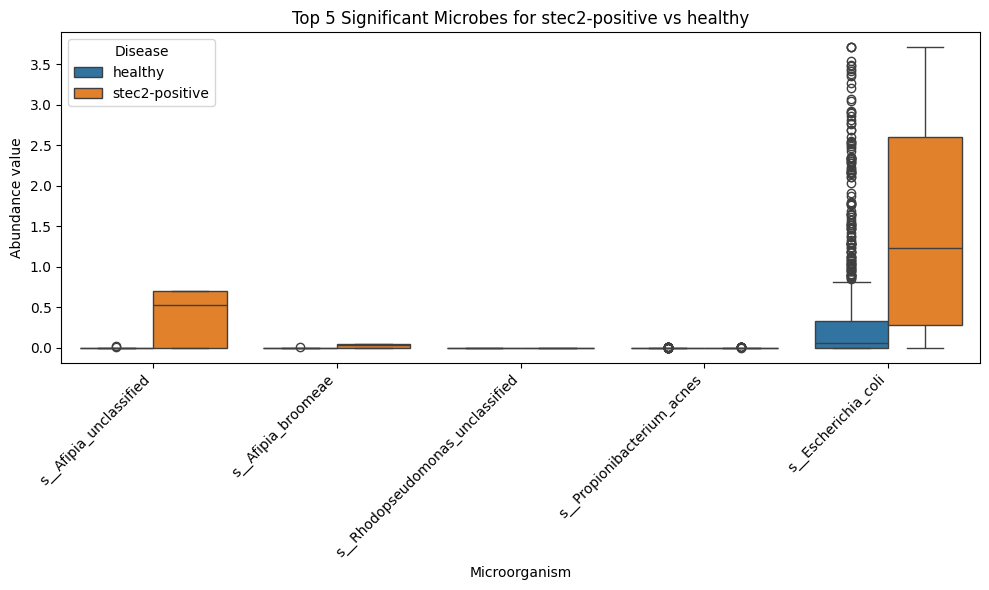

                        Microorganism        p_value     adjusted_p
528            s__Afipia_unclassified  4.064050e-186  3.316265e-183
661                s__Afipia_broomeae  6.217158e-157  5.073201e-154
530  s__Rhodopseudomonas_unclassified   2.300638e-98   1.877321e-95
470        s__Propionibacterium_acnes   9.016008e-27   7.357062e-24
221               s__Escherichia_coli   4.618613e-26   3.768788e-23

 Analyzing: ibd_ulcerative_colitis vs healthy


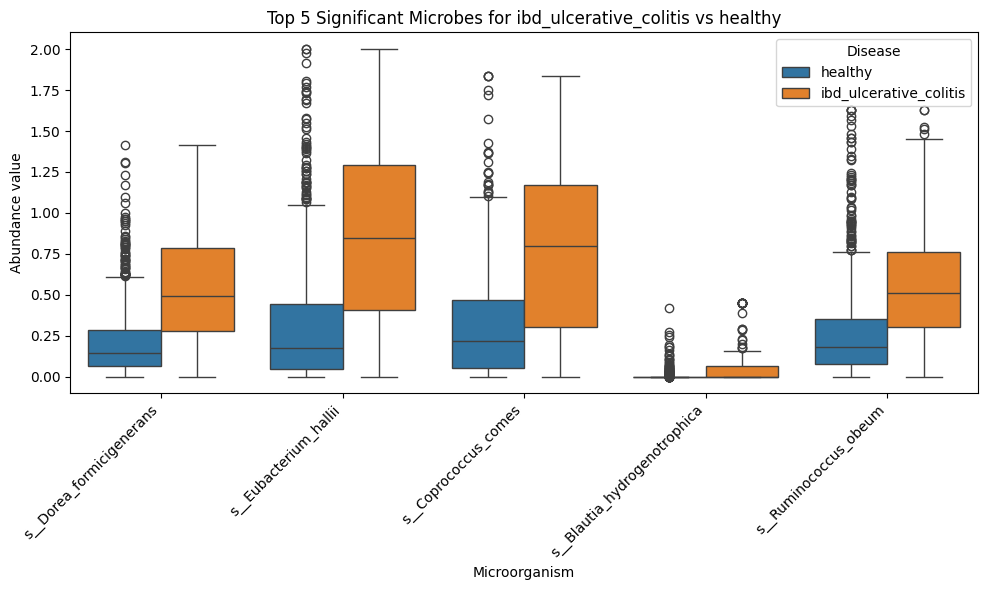

                    Microorganism       p_value    adjusted_p
141      s__Dorea_formicigenerans  1.049740e-50  8.565880e-48
125         s__Eubacterium_hallii  3.755986e-46  3.064885e-43
138          s__Coprococcus_comes  5.900669e-44  4.814946e-41
131  s__Blautia_hydrogenotrophica  1.885656e-39  1.538695e-36
133         s__Ruminococcus_obeum  3.650225e-27  2.978584e-24

 Analyzing: ibd_crohn_disease vs healthy


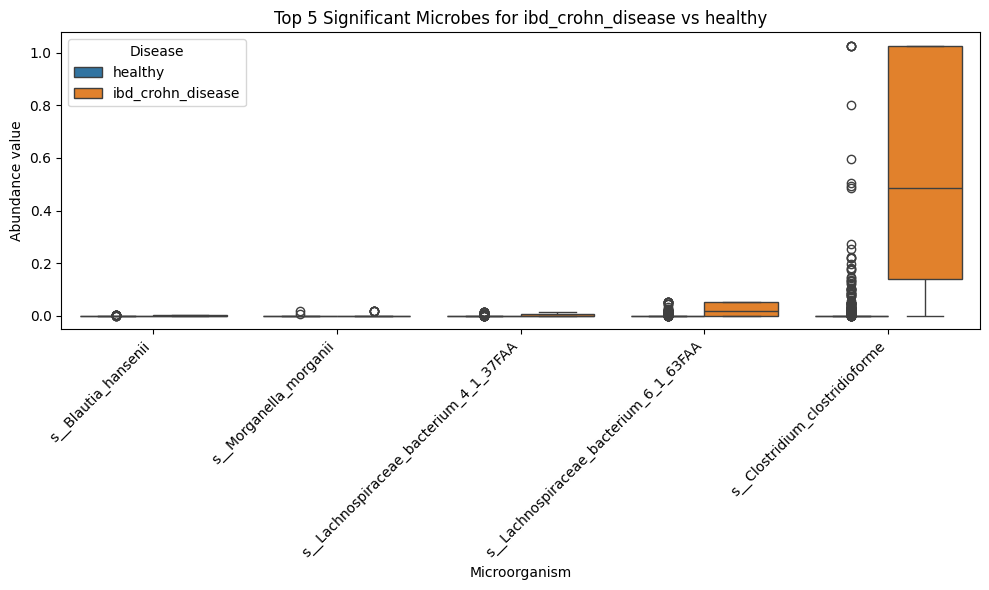

                              Microorganism       p_value    adjusted_p
358                     s__Blautia_hansenii  4.400948e-46  3.591174e-43
555                  s__Morganella_morganii  5.043249e-37  4.115292e-34
149  s__Lachnospiraceae_bacterium_4_1_37FAA  2.363235e-28  1.928400e-25
362  s__Lachnospiraceae_bacterium_6_1_63FAA  1.701591e-26  1.388498e-23
106          s__Clostridium_clostridioforme  2.273339e-25  1.855044e-22

 Analyzing: cirrhosis vs healthy


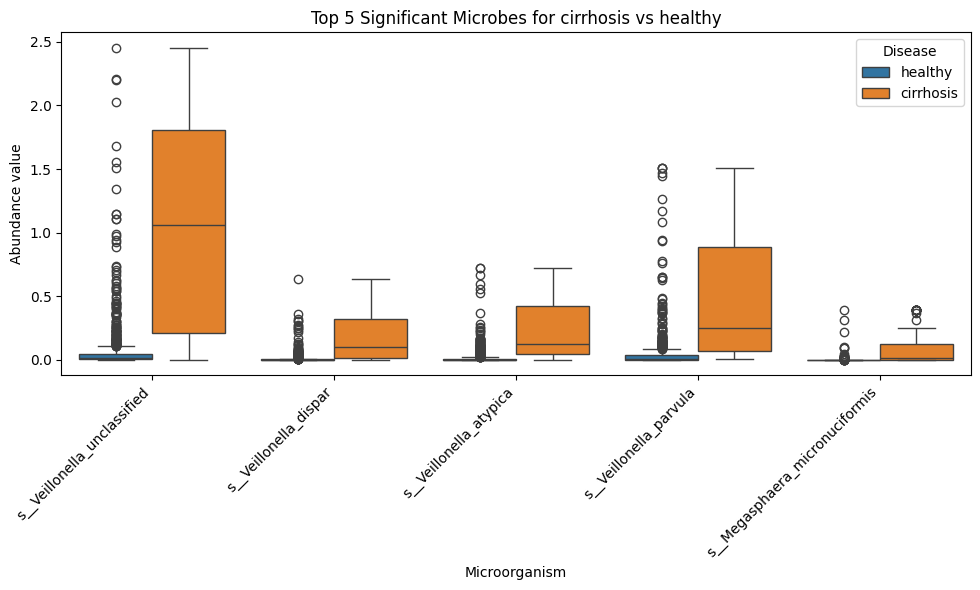

                      Microorganism        p_value     adjusted_p
201     s__Veillonella_unclassified  2.875569e-133  2.346465e-130
199           s__Veillonella_dispar   3.229064e-93   2.634917e-90
198          s__Veillonella_atypica   1.157861e-85   9.448146e-83
200          s__Veillonella_parvula   4.128754e-77   3.369063e-74
395  s__Megasphaera_micronuciformis   1.625534e-61   1.326435e-58

 Analyzing: overweight vs healthy


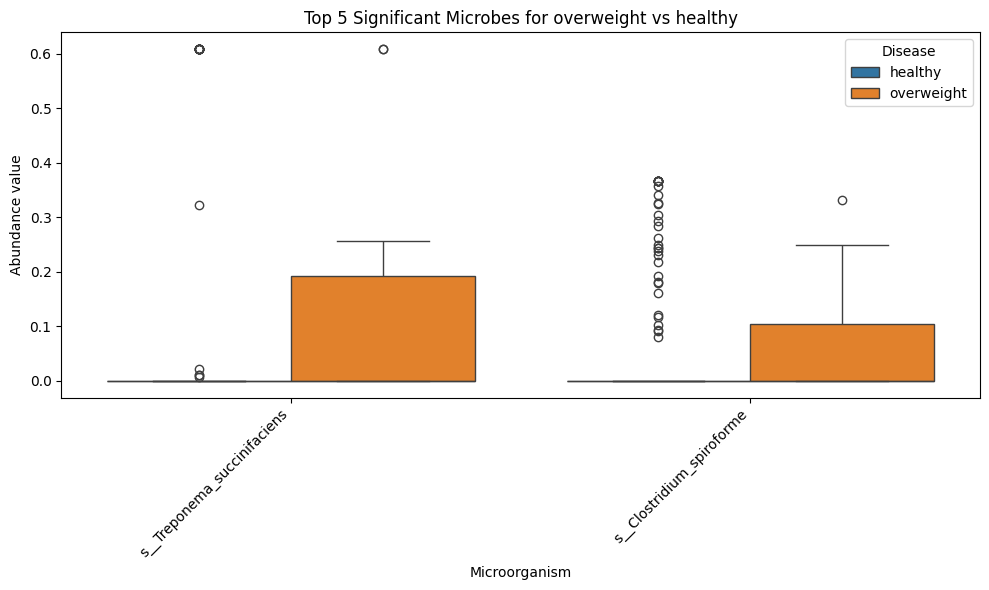

                   Microorganism       p_value  adjusted_p
231  s__Treponema_succinifaciens  1.042568e-08    0.000009
381    s__Clostridium_spiroforme  2.223561e-05    0.018144

 Analyzing: t2d vs healthy


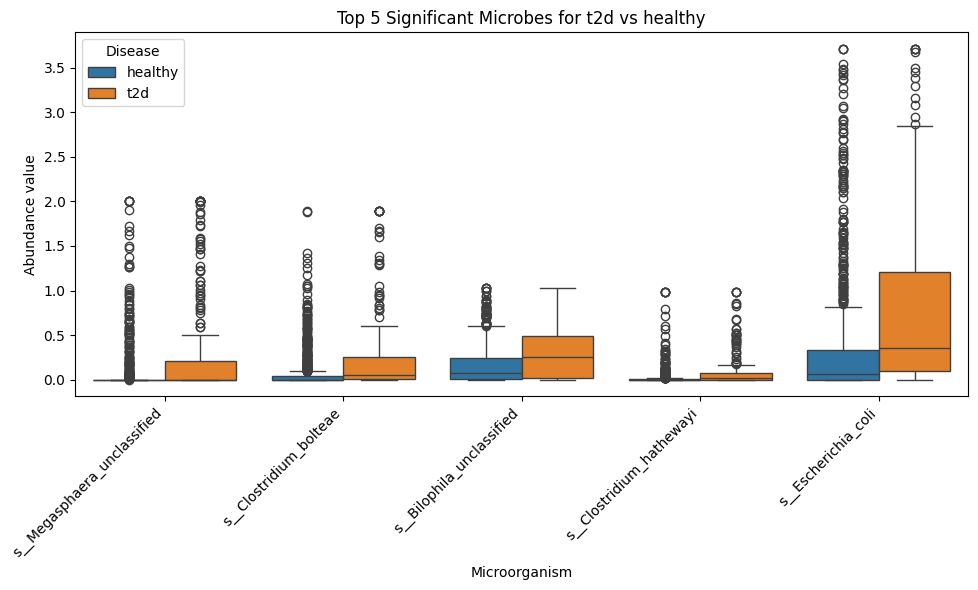

                   Microorganism       p_value    adjusted_p
195  s__Megasphaera_unclassified  2.064189e-20  1.684378e-17
104       s__Clostridium_bolteae  5.126445e-18  4.183179e-15
210    s__Bilophila_unclassified  6.711552e-18  5.476626e-15
107     s__Clostridium_hathewayi  1.251882e-16  1.021536e-13
221          s__Escherichia_coli  9.062457e-16  7.394965e-13

 Analyzing: impaired_glucose_tolerance vs healthy


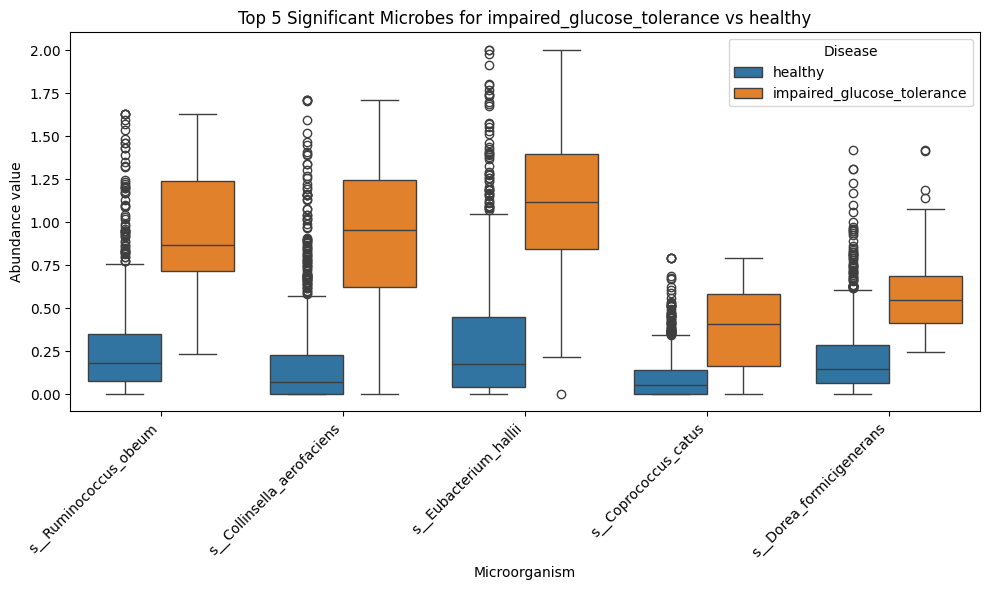

                  Microorganism       p_value    adjusted_p
133       s__Ruminococcus_obeum  2.496406e-48  2.037067e-45
19   s__Collinsella_aerofaciens  3.114855e-47  2.541721e-44
125       s__Eubacterium_hallii  1.323525e-40  1.079996e-37
137        s__Coprococcus_catus  5.550712e-39  4.529381e-36
141    s__Dorea_formicigenerans  3.851205e-32  3.142584e-29

 Analyzing: CRC vs healthy


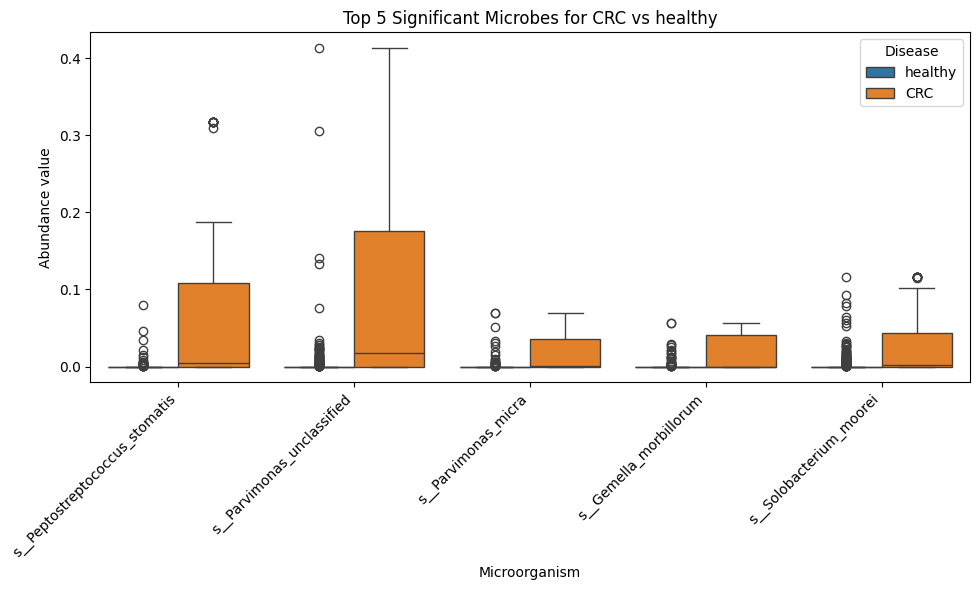

                      Microorganism       p_value    adjusted_p
372  s__Peptostreptococcus_stomatis  7.200206e-77  5.875368e-74
115      s__Parvimonas_unclassified  1.786772e-63  1.458006e-60
350             s__Parvimonas_micra  6.960957e-63  5.680141e-60
294          s__Gemella_morbillorum  8.552273e-53  6.978655e-50
184         s__Solobacterium_moorei  3.258772e-42  2.659158e-39

 Analyzing: small_adenoma vs healthy


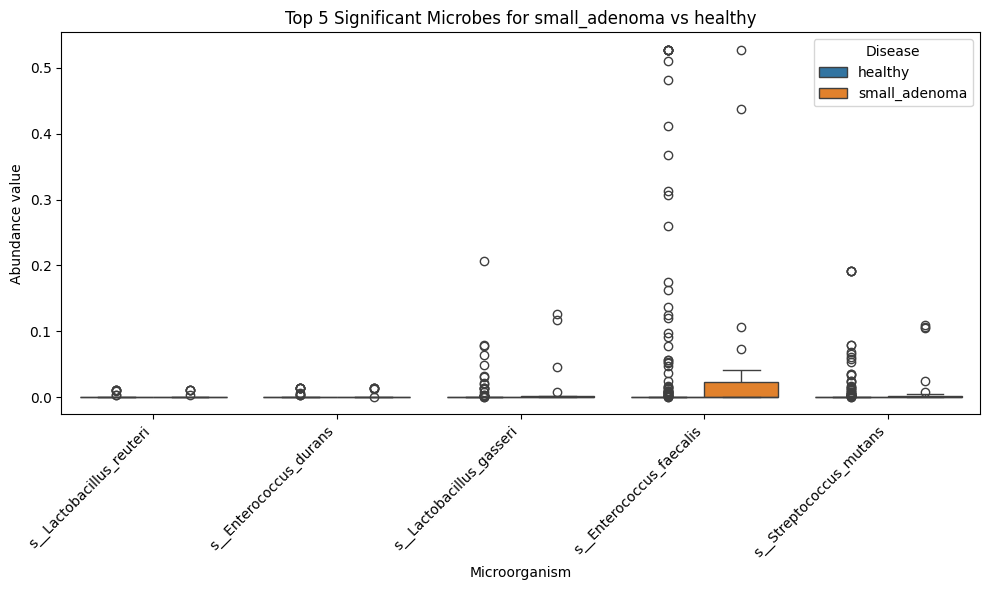

                Microorganism       p_value    adjusted_p
312  s__Lactobacillus_reuteri  1.751786e-16  1.429458e-13
301    s__Enterococcus_durans  2.036679e-16  1.661930e-13
309  s__Lactobacillus_gasseri  1.000234e-11  8.161913e-09
302  s__Enterococcus_faecalis  6.566164e-11  5.357990e-08
331   s__Streptococcus_mutans  9.888099e-11  8.068689e-08

 Analyzing: large_adenoma vs healthy


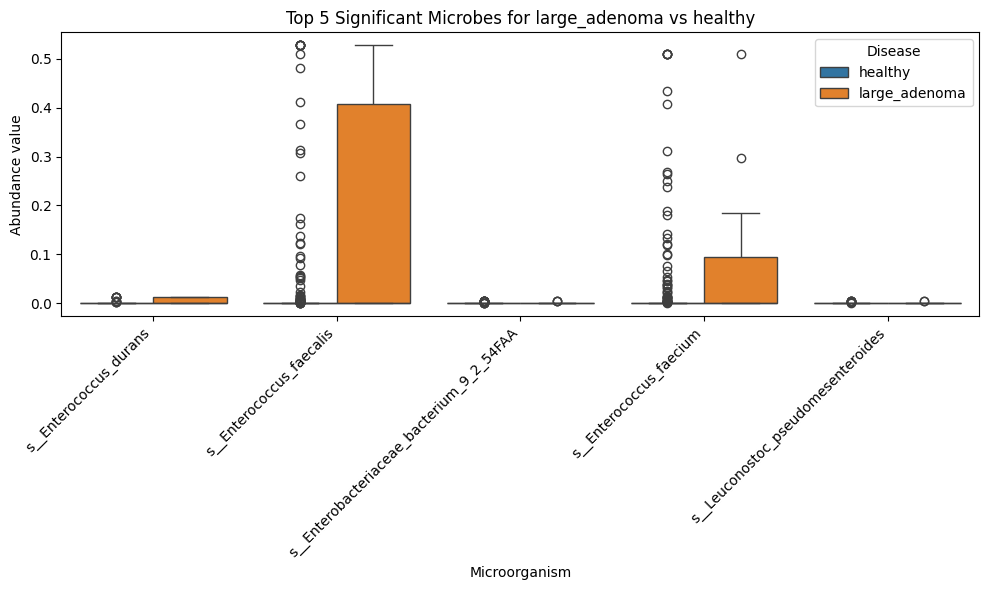

                                 Microorganism       p_value    adjusted_p
301                     s__Enterococcus_durans  1.665963e-24  1.359426e-21
302                   s__Enterococcus_faecalis  1.176094e-09  9.596923e-07
419  s__Enterobacteriaceae_bacterium_9_2_54FAA  2.637266e-09  2.152009e-06
81                     s__Enterococcus_faecium  7.761485e-07  6.333372e-04
89          s__Leuconostoc_pseudomesenteroides  1.883102e-06  1.536611e-03


In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, mannwhitneyu
from statsmodels.stats.multitest import multipletests

def analyze_microbiome_disease(X_num, y_dis, disease, control_label="healthy", top_n=5):
    """
    Belirli bir hastalık için anlamlı mikroorganizmaları analiz eder ve görselleştirir.

    Parametreler:
        X_num: Mikroorganizma bolluk verisi (DataFrame).
        y_dis: Hastalık etiketleri (Series).
        disease: Analiz edilecek hastalık ismi (str).
        control_label: Kontrol grubunun etiketi (str, varsayılan "healthy").
        top_n: Görselleştirilecek en önemli mikroorganizma sayısı (int, varsayılan 5).
    """

    # Log transformation and winsorize
    X_num_log = np.log1p(X_num)
    X_num_winsorized = X_num_log.apply(lambda col: winsorize(col, limits=[0.01, 0.01]))

    # Add 'Disease' column to X_num_winsorized before selecting it
    X_num_winsorized['Disease'] = y_dis

    print(f"\n Analyzing: {disease} vs {control_label}")
    disease_results = []
    for microbe in X_num_winsorized.columns:
        if microbe != "Disease": # Skip the 'Disease' column for the statistical tests
            healthy_group = X_num_winsorized[y_dis == control_label][microbe]
            disease_group = X_num_winsorized[y_dis == disease][microbe]

            # if data has normal distrubution--> t-testi, not --> Mann-Whitney U
            if len(healthy_group) > 30 and len(disease_group) > 30:
                _, p_value = ttest_ind(healthy_group, disease_group)
            else:
                _, p_value = mannwhitneyu(healthy_group, disease_group)

            disease_results.append([microbe, p_value])

    # P-adjust value (Bonferroni)
    disease_results_df = pd.DataFrame(disease_results, columns=["Microorganism", "p_value"])
    disease_results_df["adjusted_p"] = multipletests(disease_results_df["p_value"], method="bonferroni")[1]

    # Anlamlı mikroorganizmaları filtrele
    significant_microbes = disease_results_df[disease_results_df["adjusted_p"] < 0.05]
###
    # Top N microorganizma sorted
    top_microbes = significant_microbes.sort_values(by="adjusted_p").head(top_n)

    # visualization
    if not top_microbes.empty:
        # Get the list of top microbes
        top_microbe_names = top_microbes["Microorganism"].tolist()

        # Select the data for the top microbes and the 'Disease' column
        top_microbe_data = X_num_winsorized[top_microbe_names + ["Disease"]]

        # Melt the data into long format for seaborn
        melted_data = pd.melt(top_microbe_data[top_microbe_data["Disease"].isin([disease, control_label])],
                              id_vars=['Disease'],
                              value_vars=top_microbe_names,  # Use top_microbe_names here
                              var_name='Microorganism',
                              value_name='Abundance value')

        plt.figure(figsize=(10, 6))
        sns.boxplot(data=melted_data, x="Microorganism", y="Abundance value", hue="Disease")
        plt.xticks(rotation=45, ha="right")
        plt.title(f"Top {top_n} Significant Microbes for {disease} vs {control_label}")
        plt.tight_layout()
        plt.show()

        return top_microbes  # significant microorg.
    else:
        print(f" No significant microorganism found for {disease} vs {control_label}")
        return None  # if there is no significant microbe, give none

# run the function
for disease in y_dis.unique():
    if disease != "healthy":
        top_microbes_df = analyze_microbiome_disease(X_num, y_dis, disease)
        if top_microbes_df is not None:
            print(top_microbes_df)  # just significant microbe

In [61]:
#IF YOU WANT TO SEE ALL MICROORGANISM AND THEIR P-VALUE, P-ADJUST VALE WITHOUT VISUALIZATION
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, mannwhitneyu
from statsmodels.stats.multitest import multipletests
from scipy.stats.mstats import winsorize

# Log transformation ve winsorize
X_num_log = np.log1p(X_num)
# Apply winsorize to each column of the DataFrame
X_num_winsorized = X_num_log.apply(lambda col: winsorize(col, limits=[0.01, 0.01]))

# analysis for each disease
diseases = y_dis.unique()  # take disease name
results = {}  # empty dictionary for data saving

for disease in diseases:
    if disease != "healthy":  # dont take healthy ( no healthy vs healthy)
        print(f"\n Analyzing: {disease} vs healthy")
        disease_results = []
        for microbe in X_num_winsorized.columns:
            healthy_group = X_num_winsorized[y_dis == "healthy"][microbe]
            disease_group = X_num_winsorized[y_dis == disease][microbe]

            # if data has normal distrubution--> t-testi, not --> Mann-Whitney U
            if len(healthy_group) > 30 and len(disease_group) > 30:
                _, p_value = ttest_ind(healthy_group, disease_group)
            else:
                _, p_value = mannwhitneyu(healthy_group, disease_group)

            disease_results.append([microbe, p_value])

        # p-adjusted (Bonferroni)
        disease_results_df = pd.DataFrame(disease_results, columns=["Microorganism", "p_value"])
        disease_results_df["adjusted_p"] = multipletests(disease_results_df["p_value"], method="bonferroni")[1]

        # filter the significant microorganism and save the results
        significant_microbes = disease_results_df[disease_results_df["adjusted_p"] < 0.05]
        results[disease] = significant_microbes


for disease, significant_microbes in results.items():
    print(f"\nSignificant microorganisms for {disease} vs healthy:")
    print(significant_microbes)


 Analyzing: obesity vs healthy

 Analyzing: leaness vs healthy

 Analyzing: stec2-positive vs healthy

 Analyzing: ibd_ulcerative_colitis vs healthy

 Analyzing: ibd_crohn_disease vs healthy

 Analyzing: cirrhosis vs healthy

 Analyzing: overweight vs healthy

 Analyzing: t2d vs healthy

 Analyzing: impaired_glucose_tolerance vs healthy

 Analyzing: CRC vs healthy

 Analyzing: small_adenoma vs healthy

 Analyzing: large_adenoma vs healthy

Significant microorganisms for obesity vs healthy:
                              Microorganism       p_value    adjusted_p
9           s__Bifidobacterium_adolescentis  1.243718e-11  1.014874e-08
19               s__Collinsella_aerofaciens  9.692642e-08  7.909196e-05
25                s__Olsenella_unclassified  2.406613e-07  1.963796e-04
39              s__Bacteroides_massiliensis  5.269175e-05  4.299647e-02
45                 s__Bacteroides_stercoris  1.610526e-05  1.314189e-02
46          s__Bacteroides_thetaiotaomicron  3.427185e-05  2.796583e-02
